In [1]:
!pip install kaggle

In [6]:
#configuring the path to json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset

In [7]:
#api to fetch dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 127M/163M [00:00<00:00, 1.32GB/s]
100% 163M/163M [00:00<00:00, 1.19GB/s]


In [8]:
#extracting zipped dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset extracted')

Dataset extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Dependencies

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #to show images
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[:10])
print(without_mask_files[:10])

['with_mask_3514.jpg', 'with_mask_2408.jpg', 'with_mask_3074.jpg', 'with_mask_102.jpg', 'with_mask_305.jpg', 'with_mask_325.jpg', 'with_mask_491.jpg', 'with_mask_2761.jpg', 'with_mask_400.jpg', 'with_mask_3539.jpg']
['without_mask_2279.jpg', 'without_mask_469.jpg', 'without_mask_2503.jpg', 'without_mask_1301.jpg', 'without_mask_3333.jpg', 'without_mask_2708.jpg', 'without_mask_3339.jpg', 'without_mask_3329.jpg', 'without_mask_2307.jpg', 'without_mask_1571.jpg']


In [14]:
print('number of masked images:', len(with_mask_files))
print('number of unmasked images:', len(without_mask_files))

number of masked images: 3725
number of unmasked images: 3828


Creating Labels for the 2 classes
with mask -> 1
without mask -> 0

In [16]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

print(with_mask_labels[:10])
print(without_mask_labels[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Displaying the Images

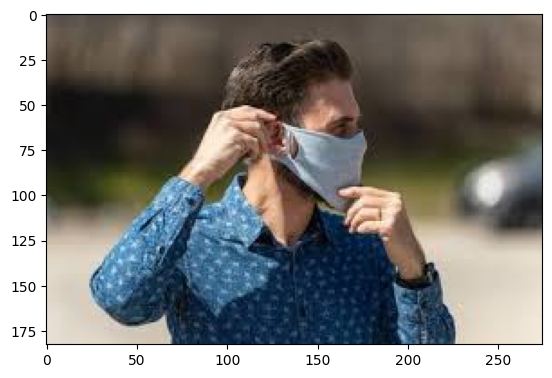

In [21]:
#displaying the mask images
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

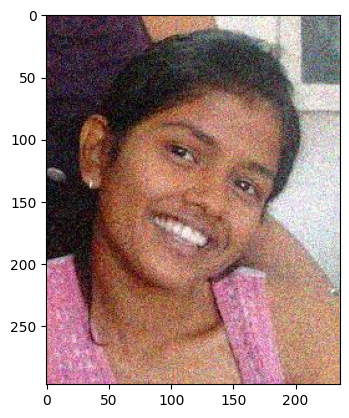

In [25]:
#displaying the without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_1301.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [27]:
#convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [30]:
print(type(data))
len(data)

<class 'list'>


7553

array([[[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [118, 113, 107]],

       [[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [119, 114, 108]],

       [[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [119, 114, 108]],

       ...,

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [139, 139, 137]],

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [139, 139, 137]],

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [140, 140, 138]]], dtype=uint8)
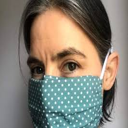

In [32]:
data[1]

In [36]:
type(data[1])

numpy.ndarray

In [35]:
data[1].shape

(128, 128, 3)

In [37]:
#converting image data list and label list to numpy array
x = np.array(data)
y = np.array(labels)

In [39]:
print(x.shape) #no. of images, size, rgb channel
print(y.shape) #no. of corresponding labels

(7553, 128, 128, 3)
(7553,)


In [40]:
#spliiting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
print(x_train.shape) #80%
print(x_test.shape) #20%
print(x.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(7553, 128, 128, 3)


In [46]:
#scaling the data (0-1)
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [48]:
print(x_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.99607843]
  [1.         1.         0.99215686]
  [1.         1.         0.98823529]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.98431373]
  [1.         1.         0.98039216]
  [1.         1.         0.98039216]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99215686 0.99607843 0.97647059]
  [0.99607843 0.99607843 0.97254902]
  [0.99215686 0.99215686 0.96862745]]

 ...

 [[0.96078431 0.96862745 0.96862745]
  [0.59215686 0.59215686 0.61176471]
  [0.51764706 0.51764706 0.56078431]
  ...
  [1.         1.         0.99607843]
  [1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]]

 [[0.98039216 0.98039216 0.98039216]
  [0.92156863 0.92156863 0.9254902 ]


Building a Convolutional Neural Network


In [49]:
import tensorflow as tf
from tensorflow import keras

In [75]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #to pass as 1d

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
#compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [77]:
#training
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - acc: 0.7441 - loss: 0.5256 - val_acc: 0.8810 - val_loss: 0.2924
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.8944 - loss: 0.2739 - val_acc: 0.9008 - val_loss: 0.2711
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9125 - loss: 0.2264 - val_acc: 0.9058 - val_loss: 0.2238
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9232 - loss: 0.2058 - val_acc: 0.9124 - val_loss: 0.2179
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9415 - loss: 0.1530 - val_acc: 0.9289 - val_loss: 0.2177
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9447 - loss: 0.1360 - val_acc: 0.9289 - val_loss: 0.2246
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9633 - loss: 0.0930 - val_acc: 0.9455 - val_loss: 0.2046
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9674 - loss: 0.0790 - val_acc: 0.9256 - val_loss: 0.2883
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms

Model Evaluation

In [78]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9329 - loss: 0.2621
Test Accuracy = 0.9305095672607422


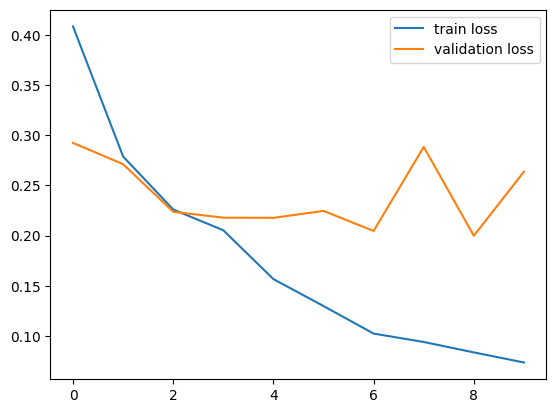

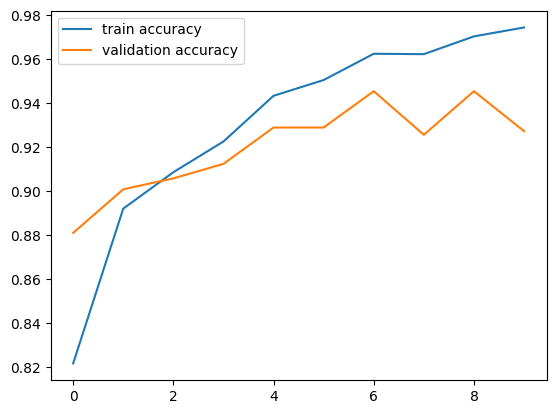

In [79]:
h = history

#plotting
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Building a Predictive System


In [82]:
print("Class distribution:", np.bincount(y_train))


Class distribution: [3078 2964]


In [83]:
{'no_mask': 0, 'mask': 1}


{'no_mask': 0, 'mask': 1}

In [84]:
print(model.predict(np.zeros((1,128,128,3))))
print(model.predict(np.ones((1,128,128,3))))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.6367924  0.36320755]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.64241683 0.3575832 ]]


Path of the image to be predicted: /content/test_withmask.jpg


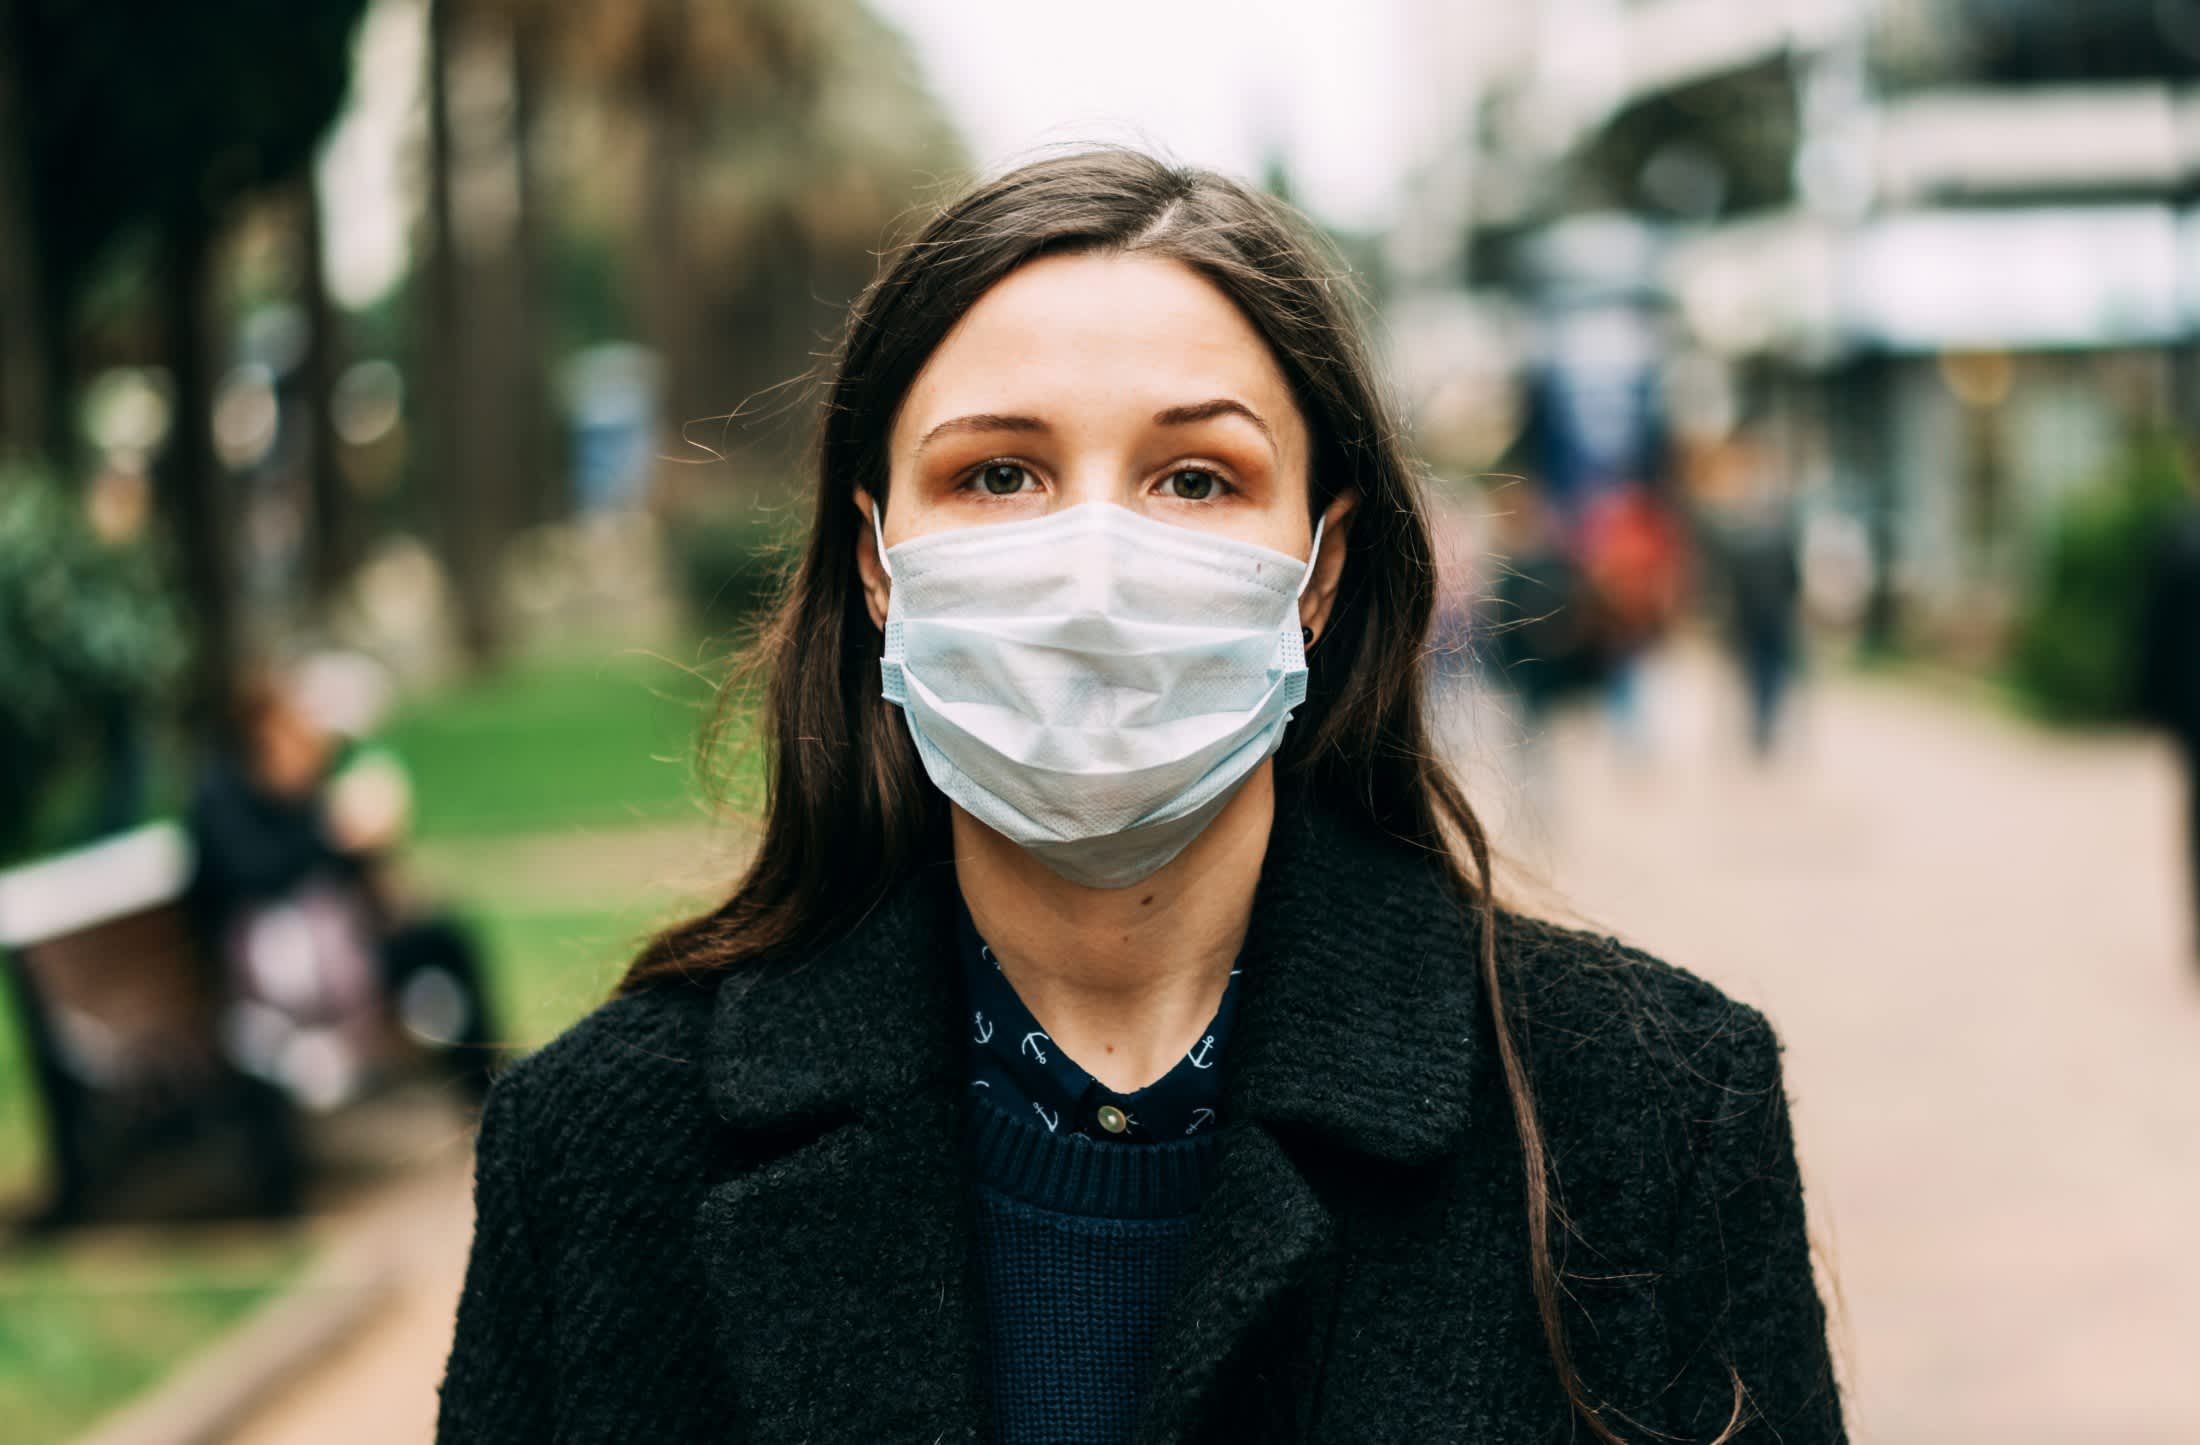

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.10271946 0.8972806 ]]
1
The person in the image is wearing a mask


In [86]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')



Path of the image to be predicted: /content/test_nomask.jpg


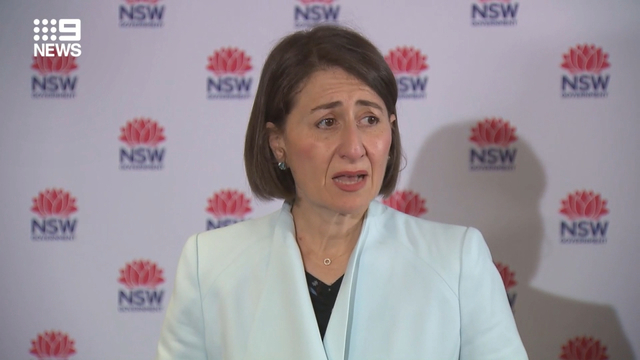

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.01564807 0.98435193]]
1
The person in the image is not wearing a mask


In [89]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')
